# Redes Convolucionales y Series Temporales

Uno de los grandes problemas dentro del machine learning es la identidficación de las características que nos permitan realizar una clasificación o regressión sobre un determinado problema. Tradicionalmente estás características han surgido como parte de la extacción del conocimiento de los expertos, lo que ellos estaban considerando, o bien por fuerza de probar diferentes aproximacions. Desde el año 2012, una nueva aproximación ha cogido especial relevancia y ha cambiado la manera en la que afrontamos los problemas con las técnicas de machine learning. Esta aproximación recibe numerosas veces el nombre de *Deep Learning* y se fundamente en que sea la red la que busque las características que le ayuden a realizar la clasificación o regresión.

## Capas Convolucionales

![Ejemplo de red](https://dschloe.github.io/img/tensorflow2.0/tutorial_06_01_2/tutorial_01.png)

Para realizar esa búsqueda de características, las redes se extructuran en dos partes fundamentales, lo que se conoce como el extractor y el clasificador. Este último no es más que una red como las que ya hemos visto en el capítulo anterior y que se suele corresponder con un *multilayer perceptron*. Por otro lado, para generar el extractor existen diversas técnicas como los *autoencoders, variational autoencoders, Random Belief Networks, etc.* No obstante, hay una técnica que destaca sobre las anteriormente mencionadas que no es otra que las redes basadas en capas convolucionales o *Convolutional Neural Networks (CNN)*.

Las arquitecturas basadas en este tipo de capas lo que realizan es una convolución de un *kernel* o matriz contra secciones de la entrada. Vemos un ejemplo en la imagen siguiente

![Ejemplo de convolucion](https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed.gif)

Lo que se consigue es obtener una o más carácterísticas mediante la aplicación de los *kernels*, esto es especialmente importante ya que, estos *kernels*, no son más que los pesos de las capas y como hemos visto en el capítulo anterior son perfectamente "entrenables" o ajustables con el uso e la regla de retropropagación del error. Es decir, que mediante el proceso de entrenamiento seremos capaces de ajustar los filtros que le queramos pasar a un conjunto de datos y de esa manera filtrar o ajustar las carácteristicas que posteriormente se utilizarán en el classificador o regresor que resuelva el problema.

Esta esquema además no se limita a un solo nivel si no que podemos hacerlo en varios niveles es decir podemos extraer características del primer grupo de carácterísticas dando por lo tanto un conjuno de carácterísticas más general o de alto nivel. Por ejemplo, imaginemos que un primer nivel detectase distintos tipos de líneas, en un segundo nivel podríamos buscar que el sistema encontase esquinas de 90 grados y posteriormente un tercero cuadrados. Si le pasamos los cuadrados de una imagen a un classificador este nos podríá decir por ejemplo si estamos ante un determinado patrón.

Cuando este esquema se replica múltiples veces estamos hablando de un sistema de *Deep Learning* habitualmente con entorno al menos a 7 de estas capas extractoras. Por ejemplo, veáse la imagen siguiente que representa lo que se conoce como una arquitectura AlexNet y que fue la propuesta que en 2012 dio lugar a la popularidad de las técnicas de Deep Learning.

![AlexNet](https://www.researchgate.net/profile/Angel-Sappa/publication/313786493/figure/fig2/AS:552464787410944@1508729277790/Illustration-of-the-architecture-of-the-AlexNet-CNN-see-3-for-details-about-the.png)



Debe destacarse que hace años el uso de este tipo de redes era impensable ya que el entrenamiento de cualquiera de ellas hubiera llevado años, pero con el uso de la computación en GPGPU (que se basa en el uso de la tarjeta gráfica para hacer cálculos que no son de gráficos) los tiempos se acortan significativamente, del orden de 100 veces en estos cálculos matriciales.

Otro elemento importante a destacar, es uno de los principales problemas de este tipo de arquitecturas que se conoce como el *vanishing gradient* el cual describe el problema de repartir el error entre los diversos elementos de las capas. Esto provoca que si la red es muy profunda, el gradiente sea prácticamente cero y, por lo tanto, no haya modificiones en los pesos. para solucionarlo, existen técnicas como el *Dropout* mencionado en el tema anterior, o la regularizacón de los gradientes.

## Series temporales

Si bien no tan populares como las imágenes cuando se trata de atacar un problema con Deep Learning, uno de las utilidades y el ejemplo que vamos a ver su uso en series temporales. Las series temporales como ya saben son sólo la recopilación periódica de datos que están ordenados cronológicamente en el tiempo y que por lo tanto guardan relación uno con el siguiente de la serie. Existen multitud de ejemplos como pueden ser señales medicas como los Electroencefalogramas con frecuencias demicrosegundos o series como la presión atmosférica para predecir el tiempo con periodicidad  de minutos, horas o días.

Estas series temporales pueden ser tratadas con aproximaciones como las que ya hemos visto durante el curso, si bien sus datos suele sacarse algun tipo de métrica de resumen de distintos tramos. Para determinar esos tramos se suele usar lo que se denomina la técnica de *sliding window* la cual selecciona un subconjunto de la información sobre la que se tratará o bien de clasificar posteriormente o bien intentar predecir algun valor a futuro 

![ejemplo de sliding window](https://www.researchgate.net/publication/305517073/figure/fig5/AS:391713446219832@1470403171856/An-example-of-EEG-segmentation-Given-a-5-second-long-EEG-signal-it-is-segmented-into.png)

## Ejemplo de uso de CNN en classificcación

El ejemplo que vamos a ver, fue unn concurso de la plataforma **Kanggle** que lo que buscaba era generar un modelo capaz de clasificar un conjunto de señales recogidas por un único sensor posicionado en un motor de combustión de Ford. Lo que se busca es poder identificar si el motor presenta un problama específico o no, por lo que estamos ante un problema de clasificación.

La base de datos de que disponemos, que recibe el nombre de FordA, consta de 3600 patrones para entrenamiento y 1319 para test que ya están divididas previamente. Los patrones son señales de 500 muestras extraidas por este sensor del motor y lo único de lo que disponemos es de la etiqueta 1 si presenta el problema y -1 si no está presente el mencionado problema.

En primer lugar vamos a obtener los datos, para ello usaremos una función de *keras* que nos facilitará mucho el trabajo en este sentido.

In [1]:
import os 
from tensorflow import keras

destination_folder = os.path.abspath("_data_/FordA")

if not os.path.isdir(destination_folder):
    os.mkdir(destination_folder)

path = keras.utils.get_file(destination_folder+"/FordA.zip", "http://www.timeseriesclassification.com/Downloads/FordA.zip", 
                            extract=True, cache_dir=destination_folder, cache_subdir='.')

Con esto habremos descargado y descomprimido los ficheros que vamos a utilizar. El siguiente paso como siempre será el cargarlos en memoria para proceder a trabajar con ellos. En este caso como se trata de ficheros sin tratar, habrá que hacer unas pocas modificaciones, en particular en lo que respecta a las entradas donde habrá que saltar una cabecera de 26 líneas y dividir las entradas posteriormente.

In [2]:
import numpy as np

def read_transform_datafile(filename):
    data =  data = np.loadtxt(filename, dtype='str', delimiter=':', skiprows=26)
    inputs = np.array([list(map(float,line.split(','))) for line in data[:,0]])
    outputs = data[:, 1].astype(int)
    return inputs, outputs

train_inputs, train_outputs = read_transform_datafile(destination_folder+"/FordA_TRAIN.ts")
test_inputs, test_outputs = read_transform_datafile(destination_folder+"/FordA_TEST.ts")


print(f'Patrones de entrenamiento: {train_inputs.shape} -> {train_outputs.shape}')
print(f'Patrones de test: {test_inputs.shape} -> {test_outputs.shape}')

Patrones de entrenamiento: (3600, 500) -> (3600,)
Patrones de test: (1319, 500) -> (1319,)


Una vez los patrones han sido cargados vamos a hacer unos cuantos cambios para facilitar el entrenamiento. En primer lugar vamos a ver si hay difernecias entre patrones positivos y negativos. Para ello vamos a sacar las clases que temos en la salida.

In [3]:
classes = np.unique(np.concatenate((train_outputs, test_outputs), axis=0))
classes

array([-1,  1])

Ahora para cada na de las clases sacaremos el primer ejemplo que aparezca en el conjunto de entradas y los pintaremos 

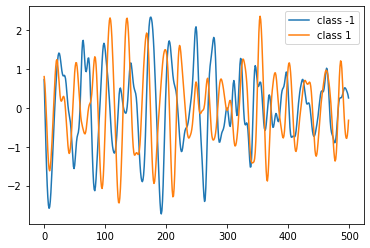

In [4]:
import matplotlib.pyplot as plt

plt.figure()
for c in classes:
    examples_class = train_inputs[train_outputs == c]
    plt.plot(examples_class[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

Lo primero que aprecimos es son señales muy diferentes y lo segundo que los valores no están normalizados entre -1 y 1. Esto puede llegar a ser un problema por eso, en este caso, se ha aplicado es una normalización en el eje temporal teniendo una media de 0 y una desviación típica de 1 pero solo para la componente temporal. Este tipo de normalización es muy habitual en los datos temporales. Por lo tanto no les haremos nada salvo un pequeño cambio en la dimensionalidad ya que el problema que tenemos es univariable y lo vamos a a dejar preparado por si en algún momento dedieramos usar un multivariable.

In [5]:
train_inputs = np.atleast_3d(train_inputs)
test_inputs = np.atleast_3d(test_inputs)
print(f'Patrones de entrenamiento: {train_inputs.shape} -> {train_outputs.shape}')
print(f'Patrones de test: {test_inputs.shape} -> {test_outputs.shape}')

Patrones de entrenamiento: (3600, 500, 1) -> (3600,)
Patrones de test: (1319, 500, 1) -> (1319,)


El otro cambio que le vamos a hacer a los datos tiene que ver con la función de loss que vamos a utilizar *sparse_categorical_crossentropy* para ello vamos a cambiar las salidas negativas por 0.

In [6]:
train_outputs[train_outputs==-1] = 0
test_outputs[test_outputs==-1] = 0
np.unique(np.concatenate((train_outputs, test_outputs), axis=0))

array([0, 1])

Por último vamos a barajar la entreda de entrenamiento para no presentar los mismos datos en entrenamiento y validación

In [7]:
idx = np.random.permutation(len(train_inputs))
train_inputs = train_inputs[idx]
train_outputs = train_outputs[idx]

# Construir nuestro modelo
En primer lugar vamos a crear una función que nos va a facilitar el crear las capas del extractor.

In [8]:
def Operator_block(input_layer, name):
    operator = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", name=name+'_conv')(input_layer)
    operator = keras.layers.BatchNormalization(name=name+'_bn')(operator)
    operator = keras.layers.ReLU(name=name+'_relu')(operator)
    return operator

La función en cuestión crea una combinación de tres capas diferentes que actuan en secuencia, a razón de una convolución que extrae de cada 3 elementos 64 características, a continuación se realiza una normalización de las salidas en función de los patrones presentados y por último se aplica una función de transferencia ReLU para asegurarnos de que no haya valores negativos y porque en este tipo de entornos se comporta mejor en el entrenamiento.

El siguiente paso será la creación de la red con tres de estos bloques funcionales 

In [9]:
def make_model(input_shape, output_size):
    # Input of the system
    input_layer = keras.layers.Input(input_shape) 
    # Feture Extractor
    conv1 = Operator_block(input_layer, 'block1')
    conv2 = Operator_block(conv1, 'block2')
    conv3 = Operator_block(conv2, 'block3')
    # Layer to average th outputs of the samples
    gap = keras.layers.GlobalAveragePooling1D()(conv3)
    # Output layers
    output_layer = keras.layers.Dense(output_size, activation="softmax")(gap)
    # Final model to return
    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=train_inputs.shape[1:], output_size=len(classes))
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500, 1)]          0         
_________________________________________________________________
block1_conv (Conv1D)         (None, 500, 64)           256       
_________________________________________________________________
block1_bn (BatchNormalizatio (None, 500, 64)           256       
_________________________________________________________________
block1_relu (ReLU)           (None, 500, 64)           0         
_________________________________________________________________
block2_conv (Conv1D)         (None, 500, 64)           12352     
_________________________________________________________________
block2_bn (BatchNormalizatio (None, 500, 64)           256       
_________________________________________________________________
block2_relu (ReLU)           (None, 500, 64)           0     

Como podemos ver en el ruemen acabamos de crear un modelo con la frioleja de 11 capas entrenames y algo más de 25000 parámetros que es necesario ajustar, lo primero vamos a compilar el modelo, quiere decir establecerle loss parámetros que consideremos para el entrenamiento, a saber, la función de optimización, la función de loss y las métricas de rendimiento que querramos monitorizar. En este caso vamos ausar el sparse_categorical_crossentropy que nos permite diferencias simplemente las entradas que están o deben de estar a 1. Esto cambia ligeramente el como calcular el accuracy que tiene su propia forma para este caso.

In [10]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

A continuación, pasaremos a entrenar el modelo, estableciendo el número de epochs, el tamaño de los batches que se le pasan para actualizar y definiremos cuanto porcentaje del conjunto de entrenamiento usamos para la validación. Pero antes de eso vamos a definir los callbacks que vamos a pasarle al modelo, es decir funciones de utilidad que nos ayudarán a controlar el comportamiento. En este caso concreto, vamos a definir 3. EL primero es el **ModelCheckPoint** que nos permitirá salvar a un fichero el mejor modelo intermédio que tengamos. También tendremos el **EarlyStoping** que usamos en el tema anterior y el último de las funciones es **ReduceRONPLateau** esta función reduce la tasa de aprendizaje del optimizador si la validación no mejora en un cierto periodo. Así los callbacks quedaríán como

In [12]:
models_folder = os.path.abspath("_models_")

if not os.path.isdir(models_folder):
    os.mkdir(models_folder)


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "_models_/best_FordA.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=10, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1),
]

Por último llamaremos a la función de entrenamiento con los parámetros que queramos. En este cas hay que destacar que, del conjunto de entrenameinto, el 20% se ha reservado para validación es decir 720 patrones de los 3600 nunca serán utilizados para actualizar los pesos.

In [13]:
history = model.fit(train_inputs, train_outputs,
    batch_size=32, epochs=100,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
90/90 [==============================] - 5s 50ms/step - loss: 0.5984 - sparse_categorical_accuracy: 0.6765 - val_loss: 0.8293 - val_sparse_categorical_accuracy: 0.4958
Epoch 2/100
90/90 [==============================] - 4s 46ms/step - loss: 0.4604 - sparse_categorical_accuracy: 0.7827 - val_loss: 0.9877 - val_sparse_categorical_accuracy: 0.4958
Epoch 3/100
90/90 [==============================] - 4s 46ms/step - loss: 0.4675 - sparse_categorical_accuracy: 0.7686 - val_loss: 1.1393 - val_sparse_categorical_accuracy: 0.4958
Epoch 4/100
90/90 [==============================] - 4s 47ms/step - loss: 0.4173 - sparse_categorical_accuracy: 0.7962 - val_loss: 1.0009 - val_sparse_categorical_accuracy: 0.4958
Epoch 5/100
90/90 [==============================] - 5s 53ms/step - loss: 0.4239 - sparse_categorical_accuracy: 0.7760 - val_loss: 1.0998 - val_sparse_categorical_accuracy: 0.4958
Epoch 6/100
90/90 [==============================] - 5s 53ms/step - loss: 0.4101 - sparse_categorica

Hecho esto deberemos de probar el modelo obtenido pero vamos a cargar el mejor modelo con el fin de testearlo sobre el que mejores resultados de validación ha obtenido. Para cargar un modelo basta con ejecutar la siguiente línea

In [15]:
model = keras.models.load_model(models_folder+"/best_FordA.h5")


Ya solo quedaver como se ha comportado con los datos de test

In [16]:
test_loss, test_acc = model.evaluate(test_inputs, test_outputs)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

42/42 [==============================] - 0s 9ms/step - loss: 0.1160 - sparse_categorical_accuracy: 0.9621
Test accuracy 0.9620925188064575
Test loss 0.11595882475376129


Como último punto vamos a visualizar el como se ha comportado el sistema durante el entrenamiento en concreto visualizando el *accuracy* correspondiente. El siguiente cacho de código nos permite sacar los datos que hemos almacenado en la variable history, que tiene los datos historicos del entrenamiento. Así ejecutando los liguientes comandos

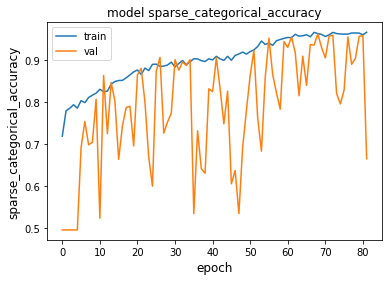

In [17]:
metric = "sparse_categorical_accuracy"
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
plt.title("model " + metric)
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

## Ejercicio
Ahora es su turno, para el ejercicio existe otra base de datos que es FordB, equivalente a este problema, pero con 3636 patrones de entrada y sólo 810 de test. Se puede descargar desde http://timeseriesclassification.com/Downloads/FordB.zip. Intente resolver el problema, puede empezar con la solución aquí propuesta para FordA y modificarla para ver cual es el mejor resultado que obtiene.